# I. Evaluate sampling distribution on a sphere
### Explain whether getRandomDirection can sample directions that are well distributed on a Sphere

I have tested whether getRandomDirection is on a sphere in uclcg file. Now test whether points are well-distributed on a sphere.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Sample points using the same method in coursework.

In [2]:
def sample_points(sample_number):
    coords = np.zeros((3, sample_number))
    for i in range(sample_number):
        e0, e1 = np.random.random(2)
        theta = np.arccos(2 * e0 - 1)
        phi = e1 * 2 * np.pi
        coords[0, i] = np.sin(theta) * np.cos(phi)
        coords[1, i] = np.sin(theta) * np.sin(phi)
        coords[2, i] = np.cos(theta)
    return coords

#### Visualise 1000 samplie points in 3D space from X/Y/Z axis

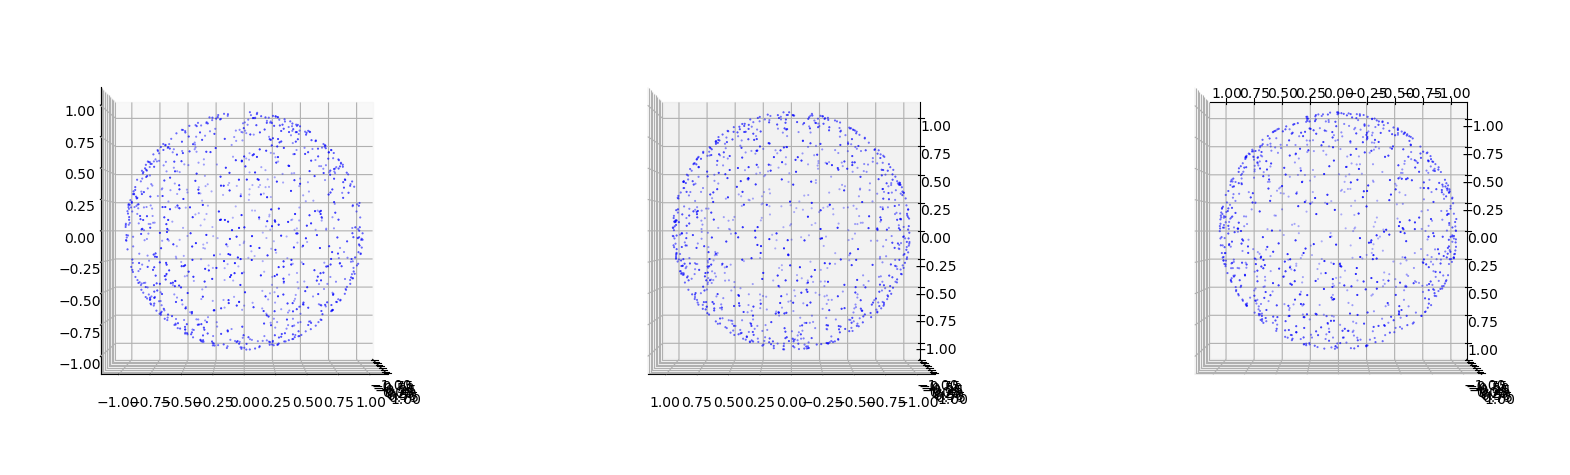

In [3]:
coords = sample_points(1000)
x = coords[0, :]
y = coords[1, :]
z = coords[2, :]
fig = plt.figure(figsize=(20,10))
axl = fig.add_subplot(131,projection='3d')
axl.set_box_aspect([1, 1, 1])
axl.view_init(0, 0)
axl.scatter(x,y,z,s=1,c='b',marker='.')
axl = fig.add_subplot(132,projection='3d')
axl.set_box_aspect([1, 1, 1])
axl.view_init(0, 90)
axl.scatter(x,y,z,s=1,c='b',marker='.')
axl = fig.add_subplot(133,projection='3d')
axl.set_box_aspect([1, 1, 1])
axl.view_init(90, 90)
axl.scatter(x,y,z,s=1,c='b',marker='.')
plt.show()

As is shown in above figure, there is no specific pattern in the distribution. But we still need quantized explanation.

#### Seperate sphere into small zones, count points and calculate the size of areas for each zone. Then calculate density.  
Input 3D points and num_partitions, where num_partitions means how many pieces should we seperate phi and theta into.  

In [4]:
def partition_check(x, y, z, num_partitions=10):
    # Convert spherical coordinates to Cartesian coordinates
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    phi = np.arccos(z / r)

    # Normalize theta to be in [0, 2*pi]
    theta = (theta + 2 * np.pi) % (2 * np.pi)

    # Create partitions with equal area in theta and phi
    theta_partitions = np.linspace(0, 2 * np.pi, num_partitions + 1)
    phi_partitions = np.linspace(0, np.pi, num_partitions + 1)

    # Compute the bin indices for each point
    theta_indices = np.digitize(theta, theta_partitions) - 1
    phi_indices = np.digitize(phi, phi_partitions) - 1

    # Count the number of points in each partition
    counts = np.zeros((num_partitions, num_partitions))
    for i in range(len(x)):
        counts[theta_indices[i], phi_indices[i]] += 1

    # Calculate areas of each partition
    delta_theta = 2 * np.pi / num_partitions
    partition_areas = np.abs((np.sin(phi_partitions[1:]) - np.sin(phi_partitions[:-1])) * delta_theta)
    partition_areas = np.hstack((partition_areas[:num_partitions//2][::-1], partition_areas[:num_partitions//2]))
    normalized_counts = counts / partition_areas
    normalized_counts /= np.max(normalized_counts)
    return normalized_counts, counts, partition_areas

#### Visualise density for each zone.  
If the density of one zone is lower, then it will become more transparent.  
If the number of sample points is big enough, the figure below will show 3 pheres with uniform colors.  
I will also test on a smaller sample set to illustrate the opposite case.

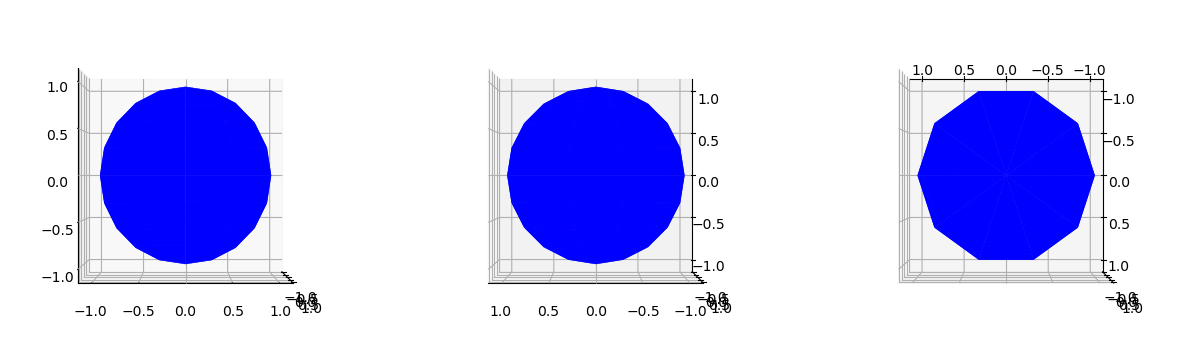

In [5]:
coords = sample_points(1000000)
x = coords[0, :]
y = coords[1, :]
z = coords[2, :]

num_partitions = 10
normalized_counts, counts, areas = partition_check(x, y, z, num_partitions)
var_true = np.var(normalized_counts)
theta_bins, phi_bins = np.meshgrid(np.linspace(0, 2 * np.pi, num_partitions + 1),
                                   np.linspace(0, np.pi, num_partitions + 1))
# Plot the results
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(0, 0)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
ax = fig.add_subplot(132, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(0, 90)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
ax = fig.add_subplot(133, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(90, 90)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
plt.show()

I seperate phi and theta into 10 pieces, with 100 zones.  
There are 1,000,000 sample points and I calculate the density for each zone. I also calculate the variance of densities.  
As is shown above, the sphere in X/Y/Z direction shows uniform blue color, which means our method of sampling points on a sphere is well-distributed.

##### Let's see the version for a smaller set.

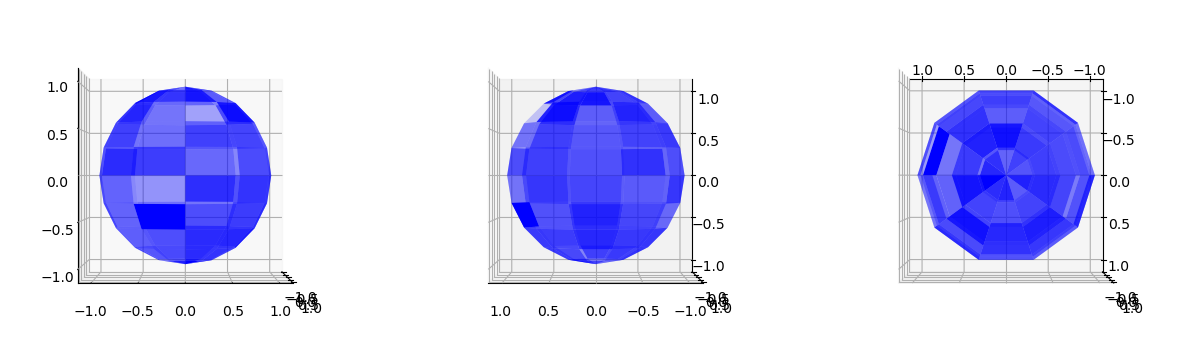

In [7]:
coords = sample_points(1000)
x = coords[0, :]
y = coords[1, :]
z = coords[2, :]

num_partitions = 10
normalized_counts, counts, areas = partition_check(x, y, z, num_partitions)
var_small = np.var(normalized_counts)
theta_bins, phi_bins = np.meshgrid(np.linspace(0, 2 * np.pi, num_partitions + 1),
                                   np.linspace(0, np.pi, num_partitions + 1))
# Plot the results
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(0, 0)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
ax = fig.add_subplot(132, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(0, 90)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
ax = fig.add_subplot(133, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(90, 90)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
plt.show()

As is shown above, if we have lesser sample points, different zones have different levels of transparency.

### Compare variances between different sample numbers  
If we have more sample points, the distribution will be closer to real situation. Smaller vaiance, better distribution.  

In [10]:
current_num = 1000
num_partitions = 10
for i in range(5):
    coords = sample_points(current_num)
    x = coords[0, :]
    y = coords[1, :]
    z = coords[2, :]
    normalized_counts, counts, areas = partition_check(x, y, z, num_partitions)
    var = np.var(normalized_counts)
    print(f'Sample Num : {current_num} | Variance : {var:.6f}')
    current_num *= 10

Sample Num : 1000 | Variance : 0.031342
Sample Num : 10000 | Variance : 0.007285
Sample Num : 100000 | Variance : 0.001607
Sample Num : 1000000 | Variance : 0.000142
Sample Num : 10000000 | Variance : 0.000015


# II. Supporting Evidence of Variance Reduction Methods

### Ground Truth  
Use original methods(no variance reduction methods) and render image for 100,000 step in resolution 1024x512 and 256x128.

Text(0.5, 1.0, 'Ground Truth 256x128')

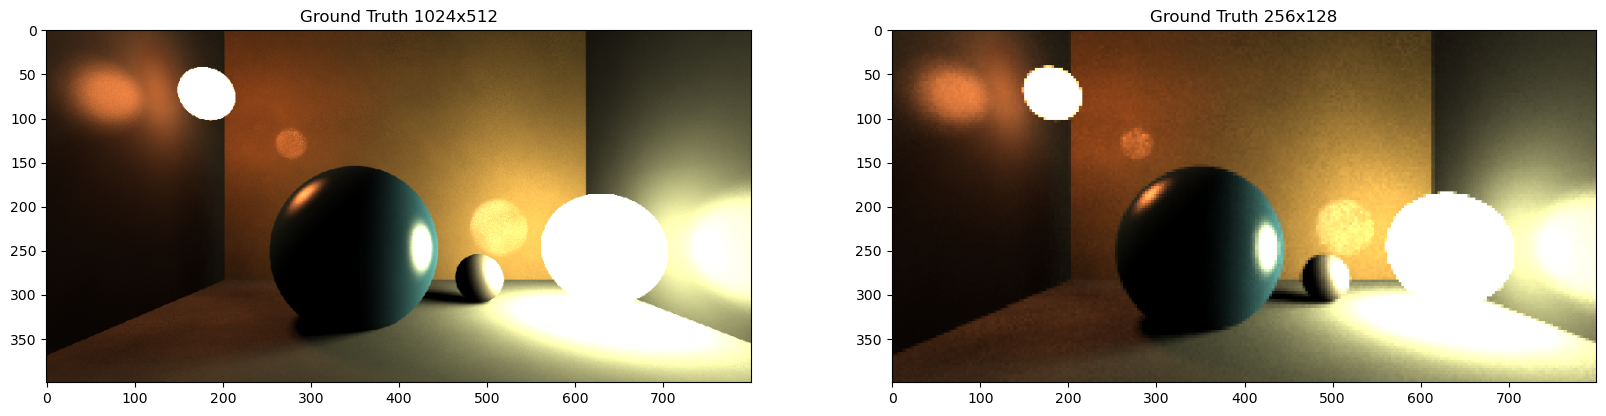

In [36]:
gt_1024 = plt.imread('img/GT_1024x512.png')[...,:3]
gt_256 = plt.imread('img/GT_256x128.png')[...,:3]

fig, axs = plt.subplots(1, 2, figsize=(20,30))
axs[0].imshow(gt_1024)
axs[0].set_title('Ground Truth 1024x512')
axs[1].imshow(gt_256)
axs[1].set_title('Ground Truth 256x128')

## 1. Illustrate whether the variance is reduced
a. Set max step to 10 and observe the performance of each method. If the variance is reduced, there will be more points rendered.  
b. Calculate PSNR and SSIM values between ground truth and each method.

In [37]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [38]:
def get_comparison(img1, img2):
    return (psnr(img1, img2), ssim(img1, img2, channel_axis=2, data_range=1.), np.mean((img1 - img2) ** 2))

In [114]:
origin_10_256 = plt.imread('img/origin_10_256.png')[...,:3]
origin_10_1024 = plt.imread('img/origin_10_1024.png')[...,:3]
halton_10_256 = plt.imread('img/halton_10_256.png')[...,:3]
halton_10_1024 = plt.imread('img/halton_10_1024.png')[...,:3]
is_diffuse_10_256 = plt.imread('img/is_diffuse_10_256.png')[...,:3]
is_diffuse_10_1024 = plt.imread('img/is_diffuse_10_1024.png')[...,:3]
is_specular_10_256 = plt.imread('img/is_specular_10_256.png')[...,:3]
is_specular_10_1024 = plt.imread('img/is_specular_10_1024.png')[...,:3]
nee_10_256 = plt.imread('img/nee_10_256.png')[...,:3]
nee_10_1024 = plt.imread('img/nee_10_1024.png')[...,:3]
score_origin_10_256 = get_comparison(origin_10_256, gt_256)
score_halton_10_256 = get_comparison(halton_10_256, gt_256)
score_is_diffuse_10_256 = get_comparison(is_diffuse_10_256, gt_256)
score_is_specular_10_256 = get_comparison(is_specular_10_256, gt_256)
score_nee_10_256 = get_comparison(nee_10_256, gt_256)
score_origin_10_1024 = get_comparison(origin_10_1024, gt_1024)
score_halton_10_1024 = get_comparison(halton_10_1024, gt_1024)
score_is_diffuse_10_1024 = get_comparison(is_diffuse_10_1024, gt_1024)
score_is_specular_10_1024 = get_comparison(is_specular_10_1024, gt_1024)
score_nee_10_1024 = get_comparison(nee_10_1024, gt_1024)

Text(0.5, 1.0, 'Origin  PSNR:10.455  SSIM:0.124')

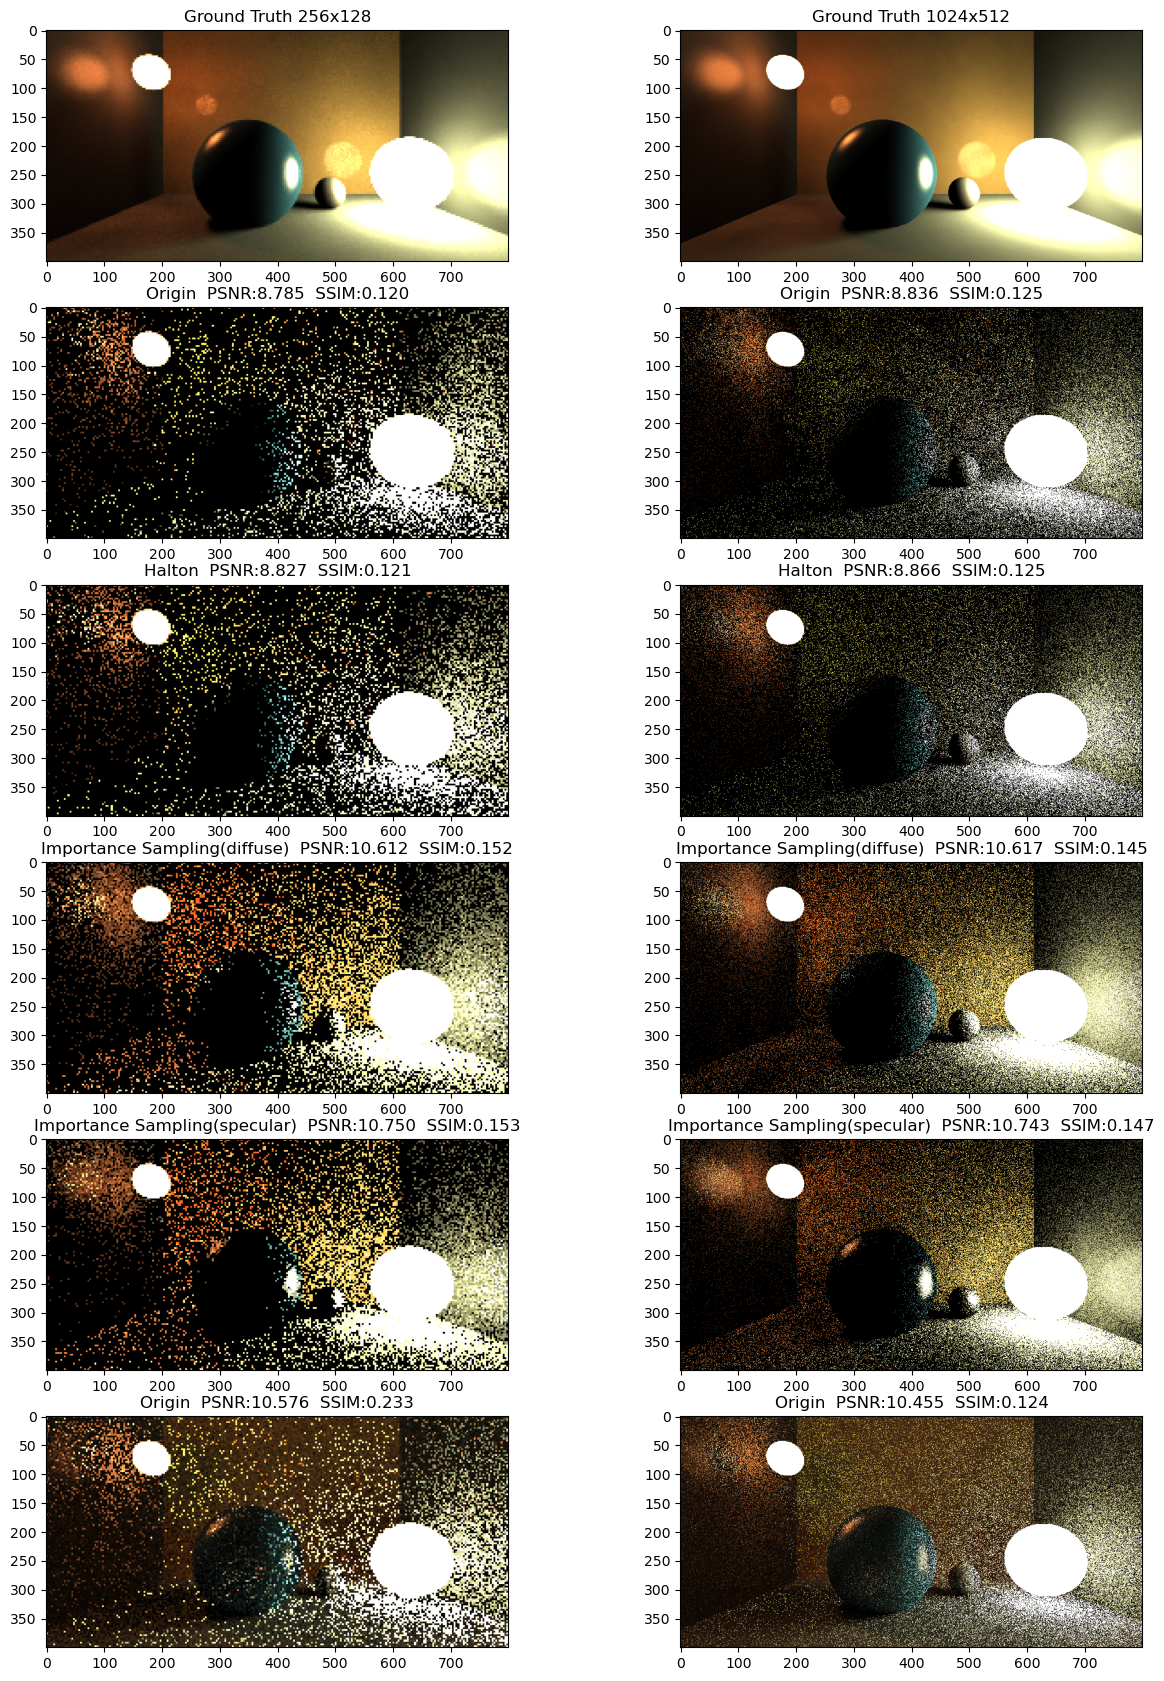

In [115]:
fig, axs = plt.subplots(6,2,figsize=(15, 21))
axs[0,0].imshow(gt_256)
axs[0,0].set_title('Ground Truth 256x128')
axs[1,0].imshow(origin_10_256)
axs[1,0].set_title(f'Origin  PSNR:{score_origin_10_256[0]:.3f}  SSIM:{score_origin_10_256[1]:.3f}')
axs[2,0].imshow(halton_10_256)
axs[2,0].set_title(f'Halton  PSNR:{score_halton_10_256[0]:.3f}  SSIM:{score_halton_10_256[1]:.3f}')
axs[3,0].imshow(is_diffuse_10_256)
axs[3,0].set_title(f'Importance Sampling(diffuse)  PSNR:{score_is_diffuse_10_256[0]:.3f}  SSIM:{score_is_diffuse_10_256[1]:.3f}')
axs[4,0].imshow(is_specular_10_256)
axs[4,0].set_title(f'Importance Sampling(specular)  PSNR:{score_is_specular_10_256[0]:.3f}  SSIM:{score_is_specular_10_256[1]:.3f}')
axs[5,0].imshow(nee_10_256)
axs[5,0].set_title(f'Origin  PSNR:{score_nee_10_256[0]:.3f}  SSIM:{score_nee_10_256[1]:.3f}')
axs[0,1].imshow(gt_1024)
axs[0,1].set_title('Ground Truth 1024x512')
axs[1,1].imshow(origin_10_1024)
axs[1,1].set_title(f'Origin  PSNR:{score_origin_10_1024[0]:.3f}  SSIM:{score_origin_10_1024[1]:.3f}')
axs[2,1].imshow(halton_10_1024)
axs[2,1].set_title(f'Halton  PSNR:{score_halton_10_1024[0]:.3f}  SSIM:{score_halton_10_1024[1]:.3f}')
axs[3,1].imshow(is_diffuse_10_1024)
axs[3,1].set_title(f'Importance Sampling(diffuse)  PSNR:{score_is_diffuse_10_1024[0]:.3f}  SSIM:{score_is_diffuse_10_1024[1]:.3f}')
axs[4,1].imshow(is_specular_10_1024)
axs[4,1].set_title(f'Importance Sampling(specular)  PSNR:{score_is_specular_10_1024[0]:.3f}  SSIM:{score_is_specular_10_1024[1]:.3f}')
axs[5,1].imshow(nee_10_1024)
axs[5,1].set_title(f'Origin  PSNR:{score_nee_10_1024[0]:.3f}  SSIM:{score_nee_10_1024[1]:.3f}')

* The first row shows the ground truth in two resolution(256x128 & 1024x512). The other rows show the performance for each method and their PSNR/SSIM values.  
* The origin method means no variance reductiond techniques are applied. It scores 8.785 in PSNR and 0.120 in SSIM for 256x128 resolution, and 8.836 in PSNR and 0.125 in SSIM for 1024x512 resolution.  
* Halton Sequence method has little improvement and can hardly seen by eyes.  
* For Importance Sampling(diffuse), it is obvious that sample points have more density and colors compared with origin version. Importance Sampling(diffuse) method only speeds up diffusion process, and its score for PSNR is over 10.6 and 0.152 for SSIM. This method performs very well.  
* For Importance Sampling(specular), it is obvious that sample points have more density and color compared with origin version. But compared with Importance Sampling(diffuse), it has more information about specular reflection but less information about diffuse reflection. Importance Sampling(specular) method speeds up both diffusion process and specular process, and its score for PSNR is over 10.7 and 0.153 for SSIM. This method performs very well, especially for highlight reflection.  
* Next Event Estimation method performs well in early steps because it considers direct light. Its score for PSNR is around 10.5. Its score for SSIM is 0.233 in 512x256 resolution and 0.124 in 1024x512 resolution.  

## 2. Illustrate whether the algorithm is unbaised  
a. Set max set to 100,000, render the image for all variance reduction methods.  
b. Compare improved images with ground truth by calculating PSNR/SSIM/L2 Loss values. If the algorithm is unbaised, there will be nearly no difference.  

In [116]:
halton_result_256 = plt.imread('img/halton_result_256.png')[...,:3]
halton_result_1024 = plt.imread('img/halton_result_1024.png')[...,:3]
is_diffuse_result_256 = plt.imread('img/is_diffuse_result_256.png')[...,:3]
is_diffuse_result_1024 = plt.imread('img/is_diffuse_result_1024.png')[...,:3]
is_specular_result_256 = plt.imread('img/is_specular_result_256.png')[...,:3]
is_specular_result_1024 = plt.imread('img/is_specular_result_1024.png')[...,:3]
nee_result_256 = plt.imread('img/nee_result_256.png')[...,:3]
nee_result_1024 = plt.imread('img/nee_result_1024.png')[...,:3]
score_halton_256 = get_comparison(halton_result_256, gt_256)
score_is_diffuse_256 = get_comparison(is_diffuse_result_256, gt_256)
score_is_specular_256 = get_comparison(is_specular_result_256, gt_256)
score_nee_256 = get_comparison(nee_result_256, gt_256)
score_halton_1024 = get_comparison(halton_result_1024, gt_1024)
score_is_diffuse_1024 = get_comparison(is_diffuse_result_1024, gt_1024)
score_is_specular_1024 = get_comparison(is_specular_result_1024, gt_1024)
score_nee_1024 = get_comparison(nee_result_1024, gt_1024)

Text(0.5, 1.0, 'NEE  PSNR:26.516  SSIM:0.853  L2 Loss:0.002230')

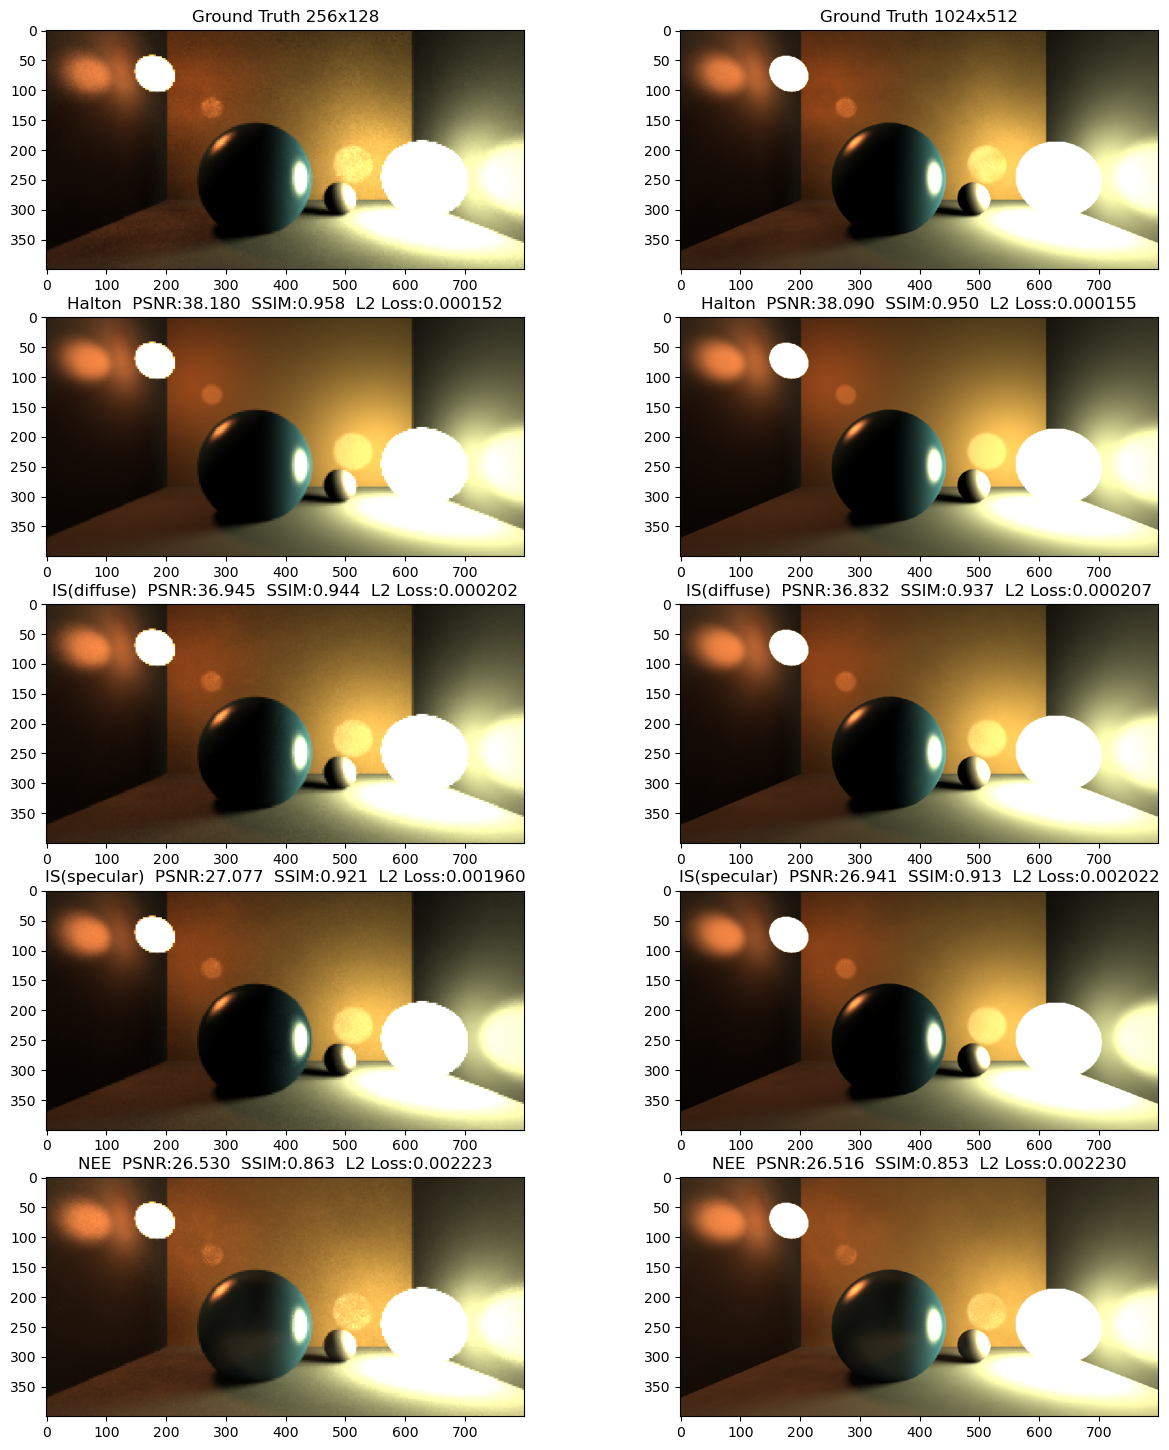

In [118]:
fig, axs = plt.subplots(5,2,figsize=(15, 18))
axs[0,0].imshow(gt_256)
axs[0,0].set_title('Ground Truth 256x128')
axs[1,0].imshow(halton_result_256)
axs[1,0].set_title(f'Halton  PSNR:{score_halton_256[0]:.3f}  SSIM:{score_halton_256[1]:.3f}  L2 Loss:{score_halton_256[2]:.6f}')
axs[2,0].imshow(is_diffuse_result_256)
axs[2,0].set_title(f'IS(diffuse)  PSNR:{score_is_diffuse_256[0]:.3f}  SSIM:{score_is_diffuse_256[1]:.3f}  L2 Loss:{score_is_diffuse_256[2]:.6f}')
axs[3,0].imshow(is_specular_result_256)
axs[3,0].set_title(f'IS(specular)  PSNR:{score_is_specular_256[0]:.3f}  SSIM:{score_is_specular_256[1]:.3f}  L2 Loss:{score_is_specular_256[2]:.6f}')
axs[4,0].imshow(nee_result_256)
axs[4,0].set_title(f'NEE  PSNR:{score_nee_256[0]:.3f}  SSIM:{score_nee_256[1]:.3f}  L2 Loss:{score_nee_256[2]:.6f}')
axs[0,1].imshow(gt_1024)
axs[0,1].set_title('Ground Truth 1024x512')
axs[1,1].imshow(halton_result_1024)
axs[1,1].set_title(f'Halton  PSNR:{score_halton_1024[0]:.3f}  SSIM:{score_halton_1024[1]:.3f}  L2 Loss:{score_halton_1024[2]:.6f}')
axs[2,1].imshow(is_diffuse_result_1024)
axs[2,1].set_title(f'IS(diffuse)  PSNR:{score_is_diffuse_1024[0]:.3f}  SSIM:{score_is_diffuse_1024[1]:.3f}  L2 Loss:{score_is_diffuse_1024[2]:.6f}')
axs[3,1].imshow(is_specular_result_1024)
axs[3,1].set_title(f'IS(specular)  PSNR:{score_is_specular_1024[0]:.3f}  SSIM:{score_is_specular_1024[1]:.3f}  L2 Loss:{score_is_specular_1024[2]:.6f}')
axs[4,1].imshow(nee_result_1024)
axs[4,1].set_title(f'NEE  PSNR:{score_nee_1024[0]:.3f}  SSIM:{score_nee_1024[1]:.3f}  L2 Loss:{score_nee_1024[2]:.6f}')

* The first row shows the ground truth in two resolution(256x128 & 1024x512). The other rows show the performance for each method and their PSNR/SSIM/L2 loss values.  
* The result for Halton Sequence method is very good, with over 38. in PSNR and over 0.95 in SSIM. L2 loss for this method is around 1.5e-4, which is near zero. Besides, Halton method seems to have better performance than ground truth as the reflected spherical light sources on the wall are smoother and walls are cleaner. Ground truth still seems to have noise even it renders for 100,000 steps.  
* For Importance Sampling(diffuse), there is still some noise but hardly noticed by eyes. Its score in PSNR is around 39. and 0.94 in SSIM. Its L2 loss is around 2e-4, which is near zero but not as good as Halton Sequence method.  
* For Importance Sampling(specular), the image is darker because some part of path tracing are used for speeding up specular reflection. So this method is not satisfied. In my opinion, this method is usefull if we want to render something in early steps with good performance as human eyes are more sensitive to highlight information.  
* For Next Event Estimation, it looks almost the same but there are some reflections on the backwards of the blue ball. The extra reflection comes from the ground while ground plane gains light from direct light calculation. While the scores are not as good as other methods, the overall performance by eyes is acceptable.  